In [44]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_moons

In [45]:
x,y = make_moons(n_samples=2000,noise=0.2)

df = pd.DataFrame({
    'x1': x[:, 0],
    'x2': x[:, 1],
    'Y': y
})


In [46]:
dataset = pd.DataFrame(df)
dataset.head(3)

,x1,x2,Y
0,2.009697,-0.166934,1
1,0.170916,0.395898,1
2,1.041268,0.051469,0


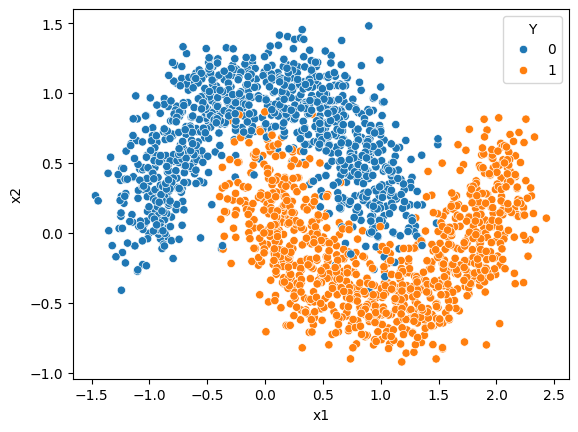

In [47]:
sns.scatterplot(x='x1',y='x2',data=dataset,hue='Y')
plt.show()

In [48]:
x_a = dataset.iloc[:,:-1]
y_a = dataset['Y']

In [49]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x_a,y_a,test_size=0.2,random_state=42)

In [50]:
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC



In [51]:
sv = SVC()
sv.fit(x_test,y_test)
sv.score(x_train,y_train)*100,sv.score(x_test,y_test)*100

(96.25, 96.0)

In [52]:
bg = BaggingClassifier(estimator=SVC(),n_estimators=45,max_samples=0.8,bootstrap=True,random_state=52)
bg.fit(x_train,y_train)

,estimator,SVC()
,n_estimators,45
,max_samples,0.8
,max_features,1.0
,bootstrap,True
,bootstrap_features,False
,oob_score,False
,warm_start,False
,n_jobs,None
,random_state,52
,verbose,0


In [53]:
bg.score(x_train,y_train)*100,bg.score(x_test,y_test)*100

(96.375, 97.0)

In [58]:
rf = RandomForestClassifier(n_estimators=30,random_state=42)
rf.fit(x_train,y_train)
rf.score(x_train,y_train)*100,rf.score(x_test,y_test)*100

(100.0, 97.75)